In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import Libraries

# DS 
import os
from itertools import islice
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import seaborn as sns

# PLOTLY
import plotly.offline as po
import plotly.graph_objs as go

# SKLEARN
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import (GradientBoostingRegressor, 
                              GradientBoostingClassifier, 
                              AdaBoostClassifier,
                              AdaBoostRegressor,
                              RandomForestRegressor,
                              RandomForestClassifier)
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence

# Aesthetic Plots
import mplcyberpunk
plt.style.use('cyberpunk')
%matplotlib inline

In [3]:
# Modules
from src.data_clean import *

In [4]:
# GLOBAL VARS
FSIZE = (12, 8)

In [5]:
# Helper Functions
def get_score(model, X, y) -> tuple:
    mse = np.mean(cross_val_score(model, X, y, scoring=make_scorer(mean_squared_error)))
    r2 = np.mean(cross_val_score(model, X, y, scoring=make_scorer(r2_score)))
    acc = np.mean(cross_val_score(model, X, y, scoring="accuracy"))
    print(f"""{model.__class__.__name__}     Train CV | MSE: {mse} | R2: {r2} | Acc: {acc}""")
    return mse, r2, acc


# Create Basline Models

In [6]:
# Read and Clean CSV
churn = data_cleaner(pd.read_csv("data/churn_train.csv"))

In [7]:
churn.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,target,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,6.94,5.0,5.000000,1.00,0.0,0.0,0.0,0.0,100.0,1.0,0.0,0.0,1.0,0.0
1,8.06,5.0,5.000000,1.00,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,21.50,4.0,4.601697,1.00,0.0,0.0,1.0,1.0,100.0,0.0,0.0,1.0,0.0,1.0
3,9.46,5.0,4.601697,2.75,0.0,100.0,1.0,0.0,100.0,0.0,0.0,1.0,1.0,0.0
4,13.77,5.0,4.601697,1.00,0.0,0.0,0.0,0.0,100.0,0.0,0.0,1.0,0.0,1.0


In [8]:
# Create X, y arrays from dataframe
X = churn
y = churn.pop("target")

In [9]:
# Train Test Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Decision Tree Classifier

## Random Forest Classifier

In [10]:
# Create Random Forest Model
model_rf = RandomForestClassifier(
                            oob_score=True,
                            max_features=3,
)

In [11]:
# Fit Data
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

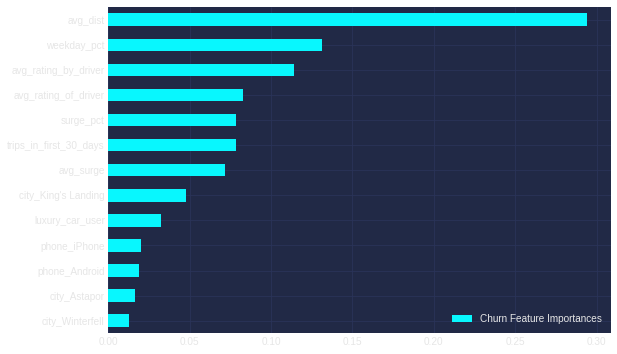

In [12]:
# Feature Importances

# See and plot feature importances 
feat_scores = pd.DataFrame({'Churn Feature Importances' : model_rf.feature_importances_},
                           index=X.columns)
feat_scores = feat_scores.sort_values(by='Churn Feature Importances')
feat_scores.plot(kind='barh', figsize=(9, 6))

In [13]:
# Out of Bag Error
model_rf.oob_score_

0.7545

In [14]:
# Prediciton
# model_rf.predict(X)

#### Random Forest Performance

In [15]:
# get_score(model_rf, X_train, y_train)

## Gradient Boosting Classifier

In [16]:
# Create Gradient Boosting Model
model_gb = GradientBoostingClassifier(learning_rate=0.1,
                                      n_estimators=100,
                                      random_state=1)

In [17]:
# Fit Model
model_gb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [18]:
# Prediction
y_pred_gb = model_gb.predict(X_test)

In [19]:
# Feature Importances
feat_scores = pd.DataFrame({'Churn Feature Importances GDBC' : model_gb.feature_importances_}, index=X.columns)
feat_scores = feat_scores.sort_values(by='Churn Feature Importances GDBC')
feat_scores.size

13

In [ ]:
# See and plot feature importances 

fig, ax = plt.subplots(figsize=FSIZE, dpi=80, )
ax.vlines(x=range(1, feat_scores.size + 1), ymin=0, ymax=(feat_scores["Churn Feature Importances GDBC"]), color="white", alpha=0.6, linewidth=20, edgecolors="white")


# Title, Label, Ticks and Ylim
ax.set_title('Feature Importances', fontdict={'size':22})
ax.set(xlabel='Feature', ylim=(0, np.max(feat_scores["Churn Feature Importances GDBC"])))
ax.set(ylabel='Importance')

plt.xticks(range(1, feat_scores.size + 1), feat_scores.index, rotation=60, horizontalalignment='right', fontsize=12)

mplcyberpunk.add_glow_effects()
mplcyberpunk.add_underglow()

fig.tight_layout()
plt.show()

## Sample Tree Plot 

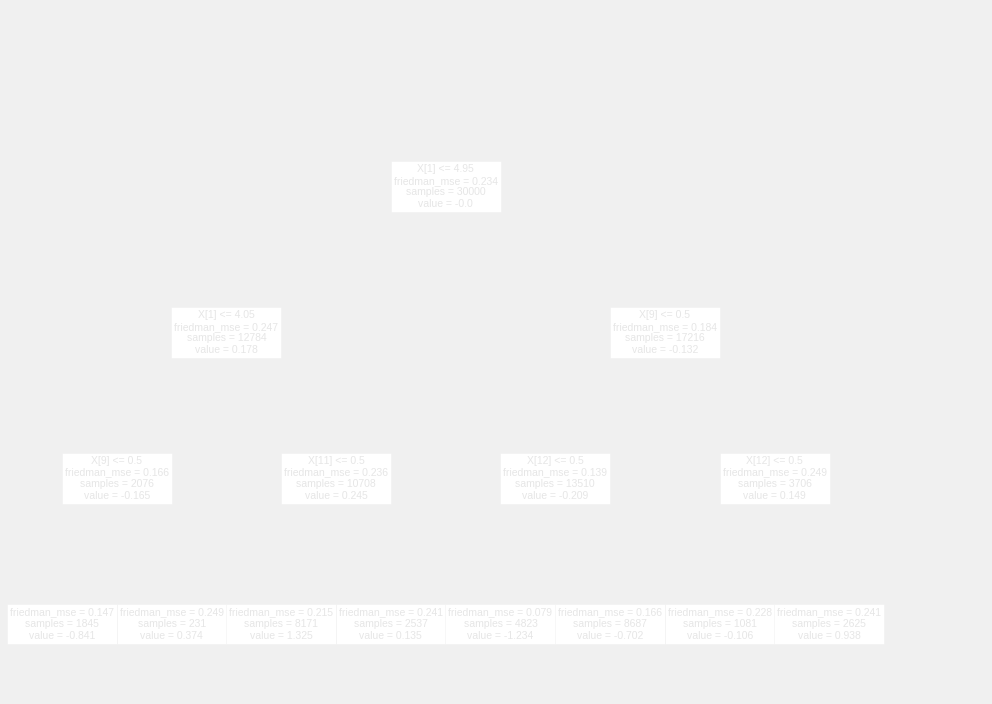

In [21]:
fig, ax = plt.subplots(figsize=(14, 10))
tree_1 = model_gb.estimators_[0][0]
tree_1_plot = plot_tree(tree_1, ax=ax)

fig.tight_layout()
plt.show()

## Confusion Matrix

In [22]:
# Confusion Matrix GBC
true_neg, false_pos, false_neg, true_pos = confusion_matrix(y_test, y_pred_gb).flatten()
true_neg, false_pos, false_neg, true_pos

(5340, 891, 1240, 2529)

| -        |       Predicted Negative      |  Predicted Positive |
| ------------- |:-------------:| -----:|
| Actual Negative | 5409 (TN)  | 890 (FP)
| Actual Positive | 1308 (FN) | 2393 (TP)

In [23]:
# Precision GBC
precision = true_pos / (true_pos + false_pos)
precision

0.7394736842105263

In [24]:
# Recall GBC
recall = true_pos / (true_pos + false_neg)
recall

0.6710002653223667

#### Gradient Boosting Peformance

In [ ]:
get_score(model_gb, X_train, y_train)